<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Assignment 7: Data Preparation for Supervised Machine Learning
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

In [23]:
# Loading the Wine Dataset
# Loading dataset
wine = load_wine()

# Convert to DataFrame
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')

# Combine for EDA
df = pd.concat([X, y], axis=1)

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [24]:
# Train-Test Split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [25]:
# Basic Dataset Information
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


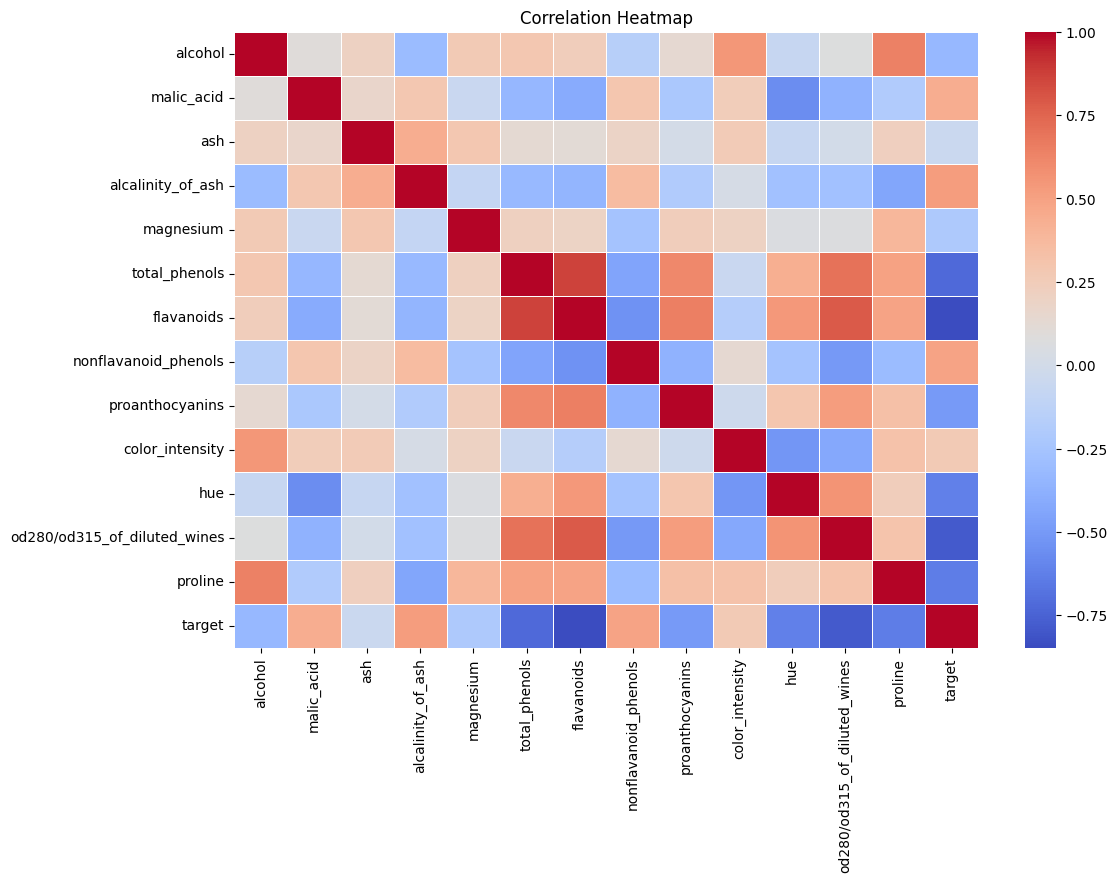

In [26]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


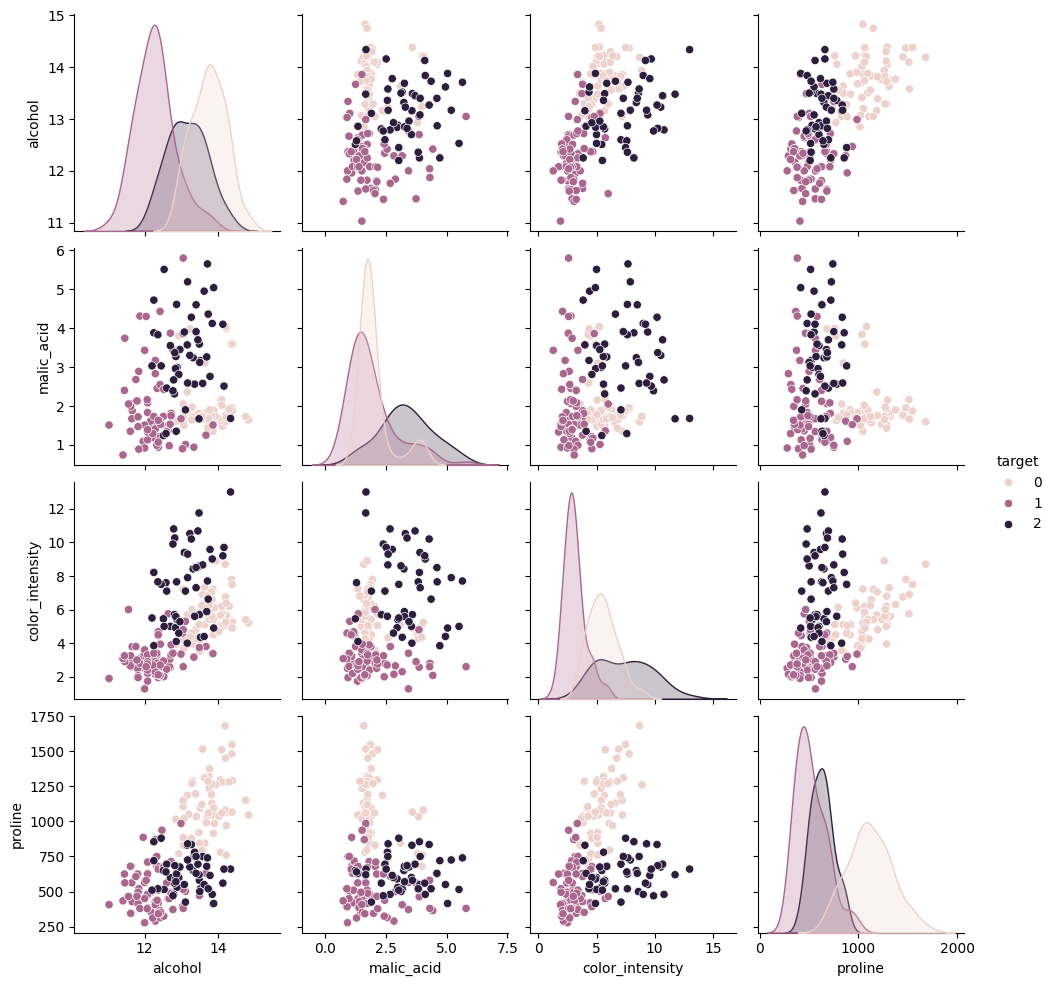

In [27]:
# Pairplot 4 Features + Target
selected_features = [
    'alcohol',
    'malic_acid',
    'color_intensity',
    'proline',
    'target'
]

sns.pairplot(df[selected_features], hue='target')
plt.show()

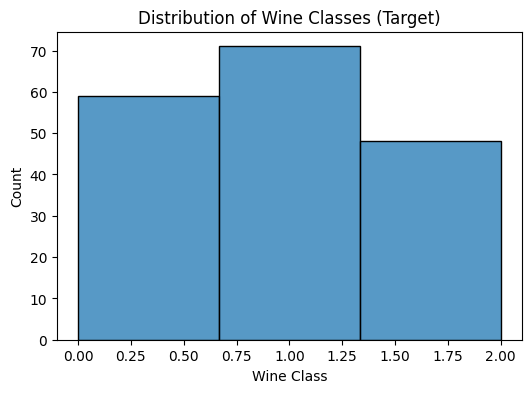

In [28]:
# Histogram of Target Variable
plt.figure(figsize=(6,4))
sns.histplot(y, bins=3, kde=False)
plt.title("Distribution of Wine Classes (Target)")
plt.xlabel("Wine Class")
plt.ylabel("Count")
plt.show()

In [11]:
"""Cell 8 — EDA Summary (Text Cell)

Key Notes:

Alcohol and proline show strong correlations with wine class.

Wine classes are clearly separable in pairplots.

The target variable contains three balanced classes.

Some features are strongly correlated which is indicating benefits from feature engineering"""

'Cell 8 — EDA Summary (Text Cell)\n\nKey Notes:\n\nAlcohol and proline show strong correlations with wine class.\n\nWine classes are clearly separable in pairplots.\n\nThe target variable contains three balanced classes.\n\nSome features are strongly correlated which is indicating benefits from feature engineering'

In [30]:
# Feature Scaling with StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Converting to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

X_train_scaled_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.665293,-0.608406,1.218962,1.605400,-0.167384,0.804002,-0.691678,1.267226,1.877540,3.419473,-1.656329,-0.879409,-0.248606
1,-0.549525,2.751541,1.003315,1.605400,-0.304379,-0.785384,-1.401233,2.049600,-0.873505,-0.024801,-0.584633,-1.254621,-0.729922
2,-0.745310,-1.143541,-0.937507,-0.282704,-0.852357,1.937029,1.746791,-1.001659,0.587987,-0.240068,0.358460,0.246227,-0.248606
3,0.612948,-0.617179,1.003315,0.879206,-0.783860,0.489272,-0.901547,1.188988,1.172585,2.881305,-1.656329,-1.129550,-0.381383
4,0.111249,-0.766315,-0.937507,-1.154137,-0.167384,0.174542,0.637487,-0.688710,-0.409266,-0.584496,0.958609,0.135053,0.946386


In [13]:
""" Feature Scaling Matters because it : -

Ensures all features contribute equally

Improves convergence of optimization algorithms

Essential for models sensitive to feature magnitude like Linear"""

' Feature Scaling Matters because it : -\n\nEnsures all features contribute equally\n\nImproves convergence of optimization algorithms\n\nEssential for models sensitive to feature magnitude like Linear'

In [31]:
# Polynomial Feature Engineering (Degree 2)
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

X_train_poly.shape


(142, 104)

In [32]:
# Train Linear Regression with Polynomial Features
lr = LinearRegression()
lr.fit(X_train_poly, y_train)

y_pred_lr = lr.predict(X_test_poly)

In [33]:
# Evaluate Linear Regression (RMSE)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_lr

np.float64(0.2927683650610427)

In [34]:
# Lasso Regression Model
lasso = Lasso(alpha=0.01, max_iter=10000)
lasso.fit(X_train_poly, y_train)

y_pred_lasso = lasso.predict(X_test_poly)

In [36]:
# Evaluating Lasso Regression
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_lasso

np.float64(0.2105767581411265)

In [19]:
"""Model Comparison

Model Performance Comparison

Linear Regression -Polynomial: RMSE = rmse_lr

Lasso Regression: RMSE = rmse_lasso

Best Model:
Lasso typically performs better because of regularization which reduces overfitting caused by polynomial features"""

'Model Comparison\n\nModel Performance Comparison\n\nLinear Regression -Polynomial: RMSE = rmse_lr\n\nLasso Regression: RMSE = rmse_lasso\n\nBest Model:\nLasso typically performs better because of regularization which reduces overfitting caused by polynomial features'

In [20]:
""" Reflection
Polynomial features improved expressiveness of the model

Lasso controlled model complexity through feature selection

Further improvements could include:

Cross-validation

Trying Ridge or ElasticNet

Using classification models instead of regression"""

' Reflection \nPolynomial features improved expressiveness of the model\n\nLasso controlled model complexity through feature selection\n\nFurther improvements could include:\n\nCross-validation\n\nTrying Ridge or ElasticNet\n\nUsing classification models instead of regression'